# Mooring Year over Year Plots

__pyversion__==3.7   
__author__==S.Bell

Given chosen mooring - list all datafiles and parameter wanted to get year over year plots

## Mooring C2
* depth - bottom

In [294]:
variable = 'T_20'

In [295]:
from netCDF4 import Dataset
from netCDF4 import num2date
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

from io_utils.EcoFOCI_netCDF_read import EcoFOCI_netCDF
from calc.EPIC2Datetime import EPIC2Datetime, Datetime2EPIC


In [296]:
files = [
'/Users/bell/ecoraid/2010/Moorings/10ckp2a/final_data/10ckp2a_sc_0039m.nc',
'/Users/bell/ecoraid/2011/Moorings/11ckp2a/final_data/11ckp2a_sc_0038m.nc',
'/Users/bell/ecoraid/2012/Moorings/12ckp2a/final_data/12ckp2a_s37_0040m.nc',
'/Users/bell/ecoraid/2013/Moorings/13ckp2a/final_data/13ckp2a_sc_0039m.nc',
'/Users/bell/ecoraid/2014/Moorings/14ckp2a/final_data/14ckp2a_sc_0039m.nc',
'/Users/bell/ecoraid/2015/Moorings/15ckp2a/final_data/15ckp2a_sc_0038m.nc',
'/Users/bell/ecoraid/2016/Moorings/16ckp2a/final_data/16ckp2a_sc_0040m.nc',
'/Users/bell/ecoraid/2017/Moorings/17ckp2a/working/17ckp2a_sc_0039m.interpolated.trimmed_missing.nc'
]

In [297]:
data={}
###nc readin/out
for file in files:
    df = EcoFOCI_netCDF(file)
    nchandle = df._getnchandle_()
    global_atts = df.get_global_atts()
    vars_dic = df.get_vars()
    data.update({file:df.ncreadfile_dic()})
    df.close()

In [298]:
## time correction
df = {}

for files in data.keys():
    print(files)
    
    #time
    ref_time_epic = 2440000
    cfdate = num2date(data[files]['time']-ref_time_epic+data[files]['time2']/1000/86400,'days since 1968-5-23')
    
    #data
    tempdata = data[files][variable][:,0,0,0].data
    tempdata[tempdata>1e30]=np.nan
    #tempdata[tempdata<20]=np.nan
    temp = pd.DataFrame({'time':cfdate,variable:tempdata})
    temp = temp.set_index(pd.DatetimeIndex(temp['time']))
    df.update({files: temp})

/Users/bell/ecoraid/2010/Moorings/10ckp2a/final_data/10ckp2a_sc_0039m.nc
/Users/bell/ecoraid/2011/Moorings/11ckp2a/final_data/11ckp2a_sc_0038m.nc
/Users/bell/ecoraid/2012/Moorings/12ckp2a/final_data/12ckp2a_s37_0040m.nc
/Users/bell/ecoraid/2013/Moorings/13ckp2a/final_data/13ckp2a_sc_0039m.nc
/Users/bell/ecoraid/2014/Moorings/14ckp2a/final_data/14ckp2a_sc_0039m.nc
/Users/bell/ecoraid/2015/Moorings/15ckp2a/final_data/15ckp2a_sc_0038m.nc
/Users/bell/ecoraid/2016/Moorings/16ckp2a/final_data/16ckp2a_sc_0040m.nc
/Users/bell/ecoraid/2017/Moorings/17ckp2a/working/17ckp2a_sc_0039m.interpolated.trimmed_missing.nc


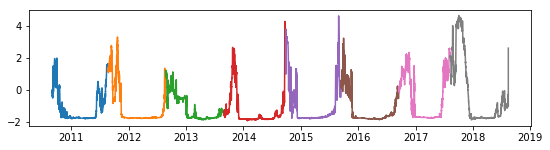

In [299]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for files in df.keys():
    plt.plot(df[files].index,df[files][variable])

In [300]:
alldf = pd.concat(df.values())
alldf = alldf.resample('1D').mean()
alldf.to_csv(variable+'_allvals.csv')

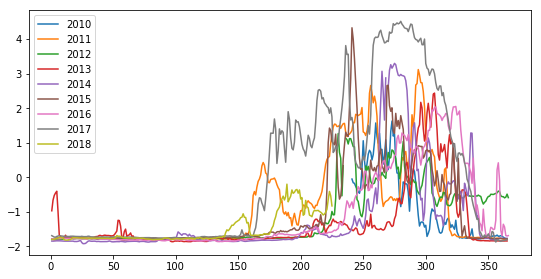

In [301]:
grp =alldf.groupby(alldf.index.year)

fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for name, group in grp:
    plt.plot(group.index.dayofyear,group[variable],label=name)
    
plt.legend()
fig.savefig('images/'+variable+'.png',dpi=300)
fig.savefig('images/'+variable+'.svg',dpi=300)

In [302]:
grp.groups.keys()

dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [303]:
## climatology by day of year
climo =alldf.groupby(alldf.index.dayofyear)
climo.mean().to_csv(variable+'_annualmean.csv')

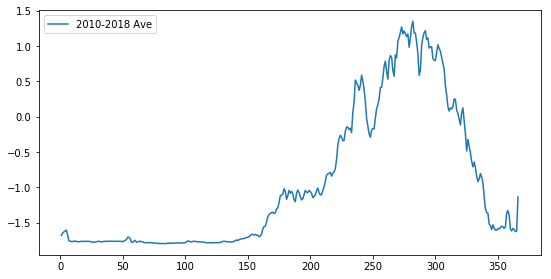

In [304]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(climo.mean().index,climo.mean()[variable],label='2010-2018 Ave')
    
plt.legend()
fig.savefig('images/'+variable+'_mean.png',dpi=300)
fig.savefig('images/'+variable+'_mean.svg',dpi=300)

In [305]:
anom = pd.read_excel('C2_TS_2010-2018.xlsx',sheet_name=variable,index_col='time')

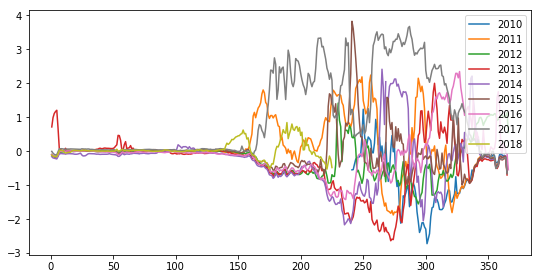

In [307]:
grp =anom.groupby(anom.index.year)

fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for name, group in grp:
    plt.plot(group.index.dayofyear,group[variable+'_Anom'],label=name)
    
plt.legend()
fig.savefig('images/'+variable+'_anom.png',dpi=300)
fig.savefig('images/'+variable+'_anom.svg',dpi=300)